## Logistic Regression
###1. Using the make blobs function in sklearn generate a dataset of 100 points with two classes. Implement Logistic regression with cross entropy loss

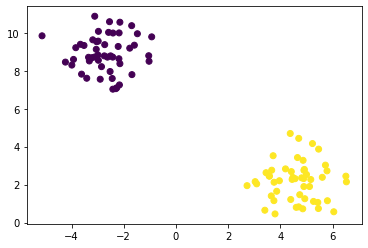

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
# To Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n = len(y_true)
    loss = -(1/n) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss

# Define the logistic regression function
def logistic_regression(X, y, learning_rate=0.1, num_iterations=1000):
    # Initialize the weights and bias
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0
    
    # Loop over the number of iterations
    for i in range(num_iterations):
        # Compute the linear combination of inputs and weights
        z = np.dot(X, w) + b
        
        # Apply the sigmoid function to obtain the predicted probabilities
        y_pred = sigmoid(z)
        
        # Compute the gradient of the loss function with respect to the weights and bias
        dw = (1/len(y)) * np.dot(X.T, (y_pred - y))
        db = (1/len(y)) * np.sum(y_pred - y)
        
        # Update the weights and bias using gradient descent
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print the loss every 100 iterations
        if i % 100 == 0:
            loss = cross_entropy_loss(y, y_pred)
            print(f"Loss after iteration {i}: {loss:.4f}")
    
    # Return the trained weights and bias
    return w, b


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model on the training set
w, b = logistic_regression(X_train, y_train)

# Evaluate the trained model on the test set
z = np.dot(X_test, w) + b
y_pred = sigmoid(z)
loss = cross_entropy_loss(y_test, y_pred)
print(f"Test loss: {loss:.4f}")

# w
# b

Loss after iteration 0: 0.6931
Loss after iteration 100: 0.0081
Loss after iteration 200: 0.0043
Loss after iteration 300: 0.0029
Loss after iteration 400: 0.0022
Loss after iteration 500: 0.0018
Loss after iteration 600: 0.0015
Loss after iteration 700: 0.0013
Loss after iteration 800: 0.0012
Loss after iteration 900: 0.0010
Test loss: 0.0007


(0.0, 12.0)

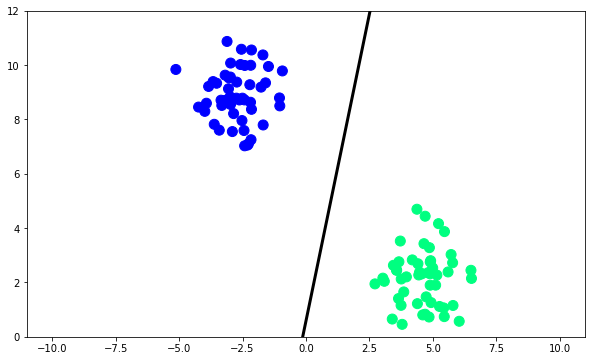

In [ ]:
m = -(w[0]/w[1])
b1 = -(b/w[1])
x_input = np.linspace(-10,10,20)
y_input = m*x_input + b1
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(0,12)

Loss after iteration 0: 0.6931
Loss after iteration 100: 0.0081
Loss after iteration 200: 0.0043
Loss after iteration 300: 0.0029
Loss after iteration 400: 0.0022
Loss after iteration 500: 0.0018
Loss after iteration 600: 0.0015
Loss after iteration 700: 0.0013
Loss after iteration 800: 0.0012
Loss after iteration 900: 0.0010


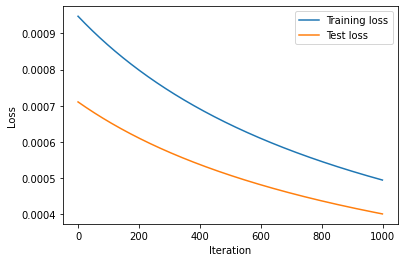

In [ ]:
# Define the accuracy function
def accuracy(y_true, y_pred):
    y_pred_class = np.round(y_pred)
    return np.mean(y_true == y_pred_class)

# Train the logistic regression model on the training set and record accuracy on the test set after each iteration
train_losses = []
test_losses = []
test_accuracies = []
w, b = logistic_regression(X_train, y_train)
for i in range(1000):
    # Compute the training loss and add it to the list
    z_train = np.dot(X_train, w) + b
    y_train_pred = sigmoid(z_train)
    train_loss = cross_entropy_loss(y_train, y_train_pred)
    train_losses.append(train_loss)
    
    # Compute the test loss and add it to the list
    z_test = np.dot(X_test, w) + b
    y_test_pred = sigmoid(z_test)
    test_loss = cross_entropy_loss(y_test, y_test_pred)
    test_losses.append(test_loss)
    
    # Compute the test accuracy and add it to the list
    test_acc = accuracy(y_test, y_test_pred)
    test_accuracies.append(test_acc)
    
    # Compute the gradient and update the weights and bias using gradient descent
    dw = (1/len(y_train)) * np.dot(X_train.T, (y_train_pred - y_train))
    db = (1/len(y_train)) * np.sum(y_train_pred - y_train)
    w -= 0.1 * dw
    b -= 0.1 * db

# Plot the training and test losses
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Test loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()
